In [7]:
import numpy as np

### Data

In [8]:
import sklearn
from pgmpy.utils import get_example_model

In [55]:
dataset_name = "insurance"

In [84]:
ground_bn = get_example_model(dataset_name)

dataset = ground_bn.simulate(n_samples = 10000)

  0%|          | 0/27 [00:00<?, ?it/s]

In [85]:
dataset.columns

Index(['ThisCarDam', 'HomeBase', 'Cushioning', 'Antilock', 'AntiTheft',
       'DrivingSkill', 'DrivHist', 'Mileage', 'Theft', 'VehicleYear', 'Airbag',
       'RiskAversion', 'PropCost', 'OtherCarCost', 'SeniorTrain', 'SocioEcon',
       'CarValue', 'ThisCarCost', 'OtherCar', 'RuggedAuto', 'ILiCost',
       'Accident', 'MedCost', 'Age', 'GoodStudent', 'DrivQuality',
       'MakeModel'],
      dtype='object')

In [86]:
target_name = 'Accident'
feature_names = list(dataset.drop(target_name, axis = 1).columns)

In [87]:
X = dataset.drop(target_name, axis = 1).to_numpy()
y = dataset[target_name].to_numpy()

In [88]:
feature_encoder = sklearn.preprocessing.OrdinalEncoder()
feature_encoder.fit(X)

target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(y.squeeze())

X = feature_encoder.transform(X)
y = target_encoder.transform(y)

In [89]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y.squeeze(), test_size = 0.2, random_state = 51)

### Model

In [90]:
from tensorflow import keras

In [91]:
def build_model(input_shape, classes, n_layers = 5, n_nodes_l = 2, n_nodes_u = 10, optimizer = 'adam', learning_rate = 0.001):
    
    model = keras.Sequential()
    model.add(keras.Input(shape = (input_shape,)))
    for i in range(n_layers):
        model.add(keras.layers.Dense(np.random.choice([i for i in range(n_nodes_l, n_nodes_u)]), activation = np.random.choice(['relu', 'sigmoid'])))
    model.add(keras.layers.Dense(classes, activation = 'softmax'))

    if optimizer == 'sgd':
        optim = keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == 'adam':
        optim = keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [92]:
n_classes = len(np.unique(y_train))
input_shape = len(X_train[0])
n_layers = 5
n_nodes_l = 5
n_nodes_u = 25
optimizer = 'adam'
learning_rate = 0.01
epochs = 25
batch_size = 100

In [93]:
model = build_model(
    input_shape,
    n_classes,
    n_layers = n_layers, 
    n_nodes_l = n_nodes_l,
    n_nodes_u = n_nodes_u, 
    optimizer = optimizer, 
    learning_rate = learning_rate
)

model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2)
model.summary()

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7141 - loss: 0.8432 - val_accuracy: 0.8256 - val_loss: 0.5331
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4313 - val_accuracy: 0.8544 - val_loss: 0.3514
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8656 - loss: 0.3398 - val_accuracy: 0.9019 - val_loss: 0.2878
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8889 - loss: 0.2875 - val_accuracy: 0.9100 - val_loss: 0.2566
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.2527 - val_accuracy: 0.9100 - val_loss: 0.2364
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9064 - loss: 0.2422 - val_accuracy: 0.9187 - val_loss: 0.2383
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9091 - loss: 0.2311 - val_accuracy: 0.9187 - val_loss: 0.2193
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.2455 - val_accuracy: 0.9206 - val_loss:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 9)              │           189 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 18)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 22)             │           418 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            92 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,697 (18.35 KB)

 Trainable params: 1,565 (6.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,132 (12.24 KB)

In [94]:
y_pred = model(X_test)
y_pred = np.argmax(y_pred, axis = 1)

accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9460


#### Explanations

In [95]:
import os
import json
from explainer.explainer import Explainer
from explainer.metrics import markov_blanket, distribution_drift, average_distribution_drift, divergence_plot, fidelity_plot, mb_accuracy

In [97]:
results = []
experiment_name = data_filename = os.path.join("./data/results", dataset_name)
ground_mb = markov_blanket(ground_bn, target_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.6644266160744892
Explainer MB Features Divergence: 0.00010891456239256232
Ground MB Features Divergence: 0.00033500366635363905
Outside Ground MB Featues Divergence: 0.07316431266802895
Outside Explainer MB Features Divergence: 0.07224036778042665


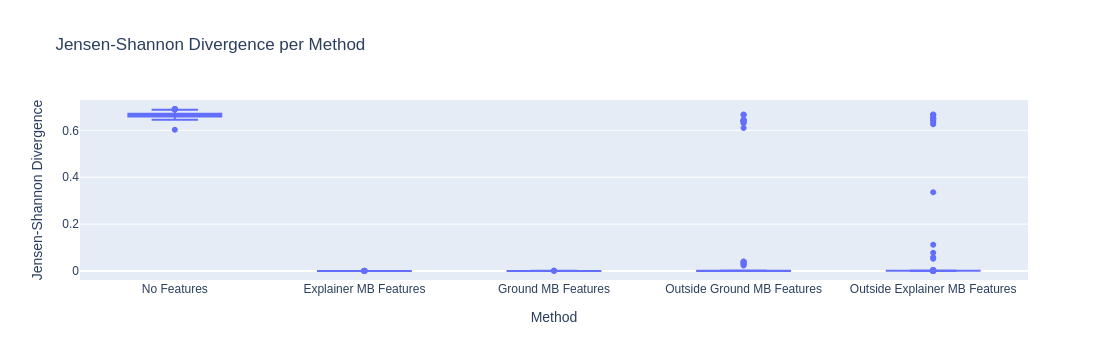

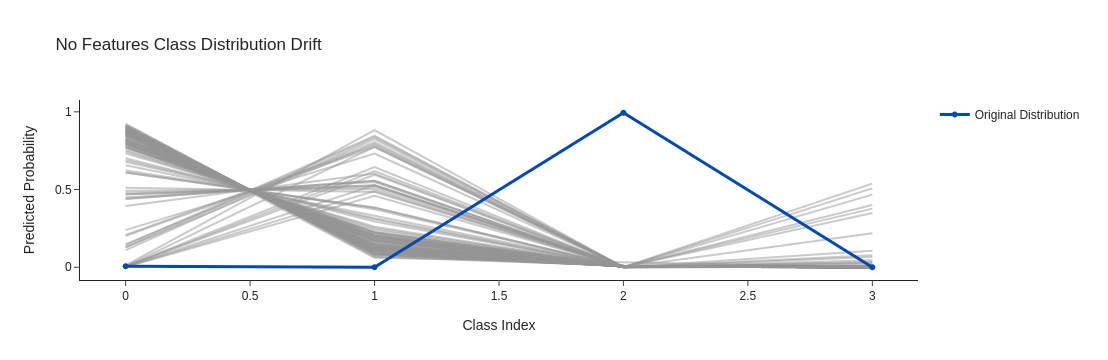

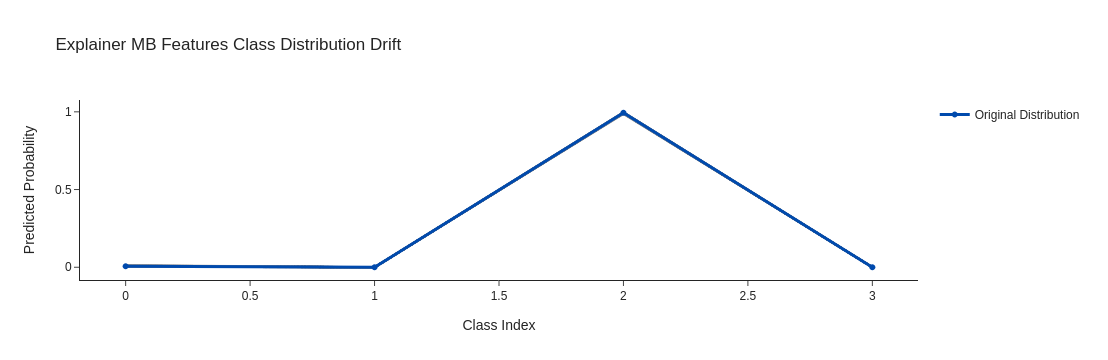

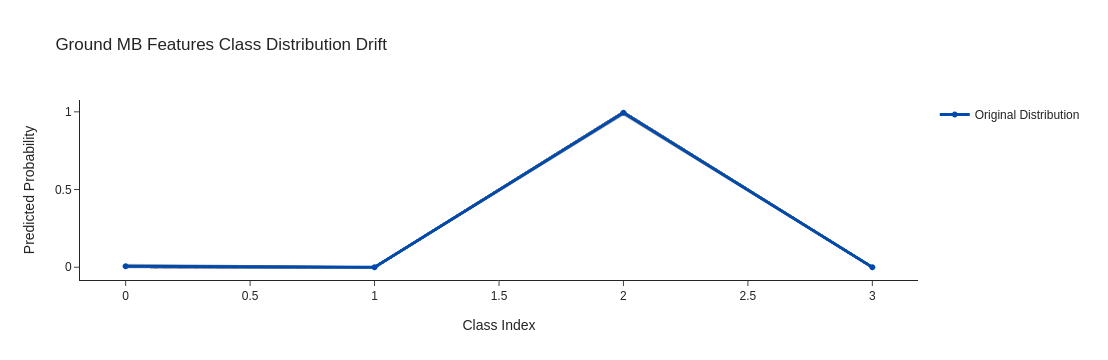

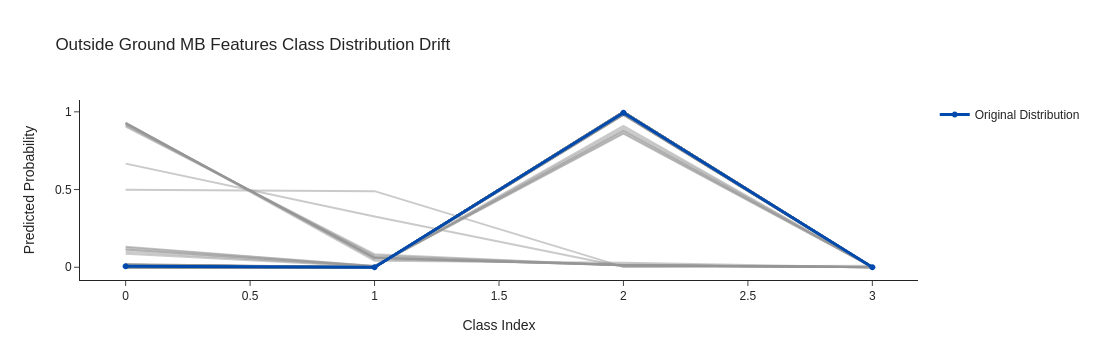

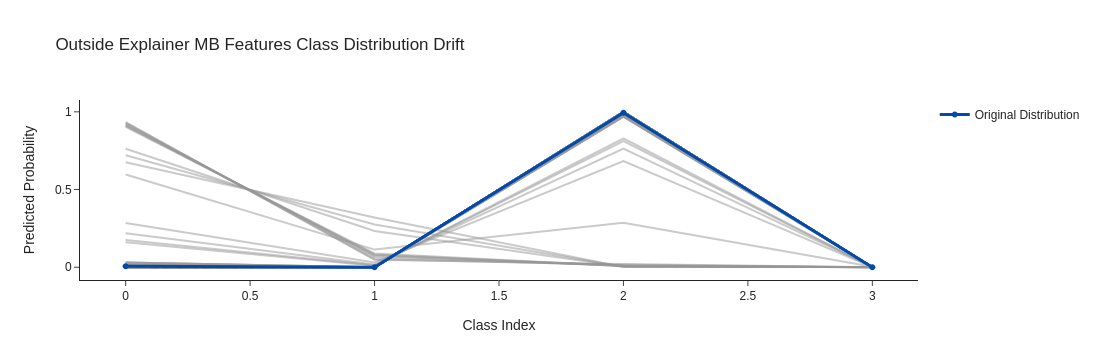

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.19320038561021513
Explainer MB Features Divergence: 0.049544877891993216
Ground MB Features Divergence: 0.08351984806663333
Outside Ground MB Featues Divergence: 0.19257857785769697
Outside Explainer MB Features Divergence: 0.24488033911184903


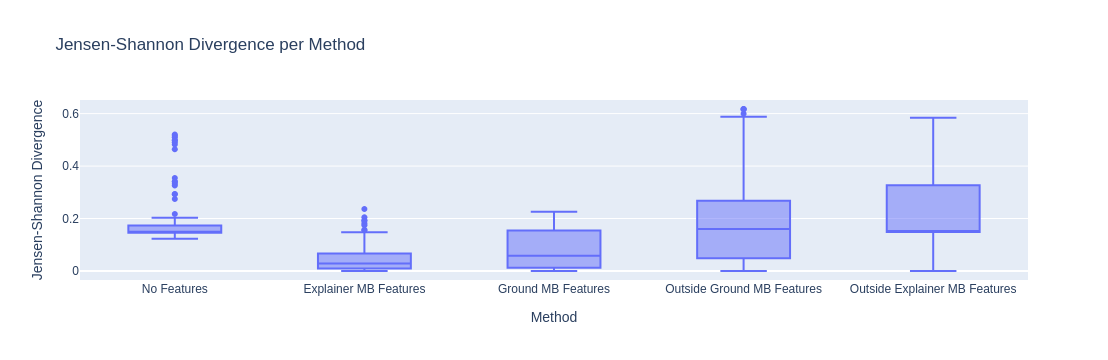

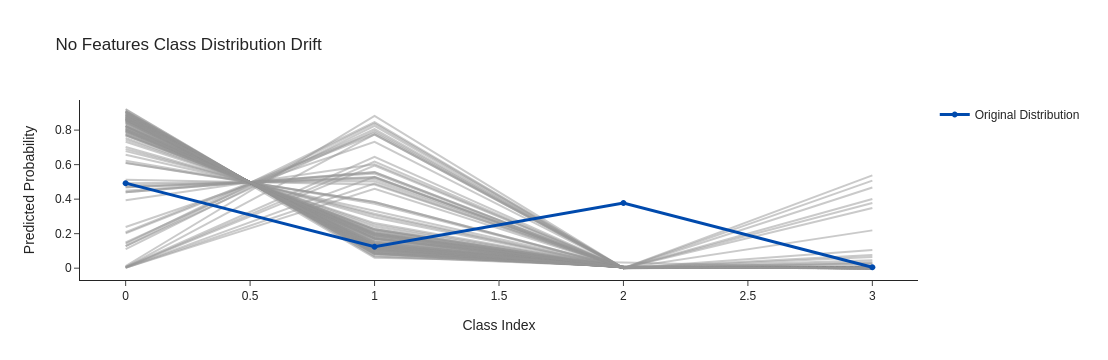

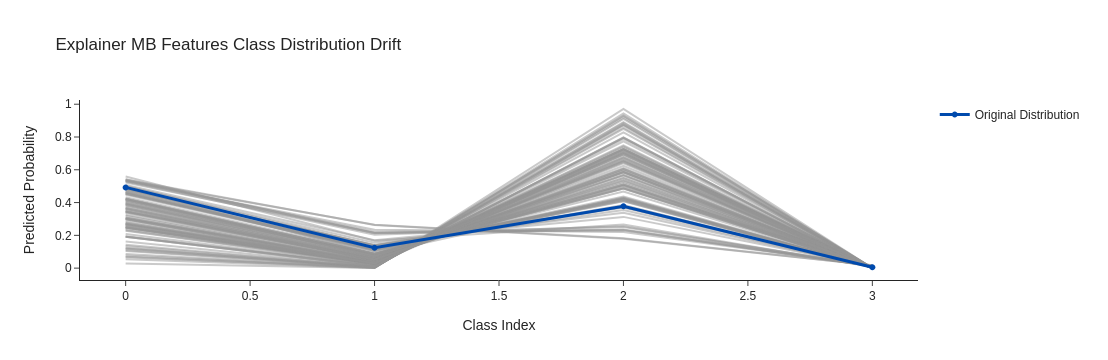

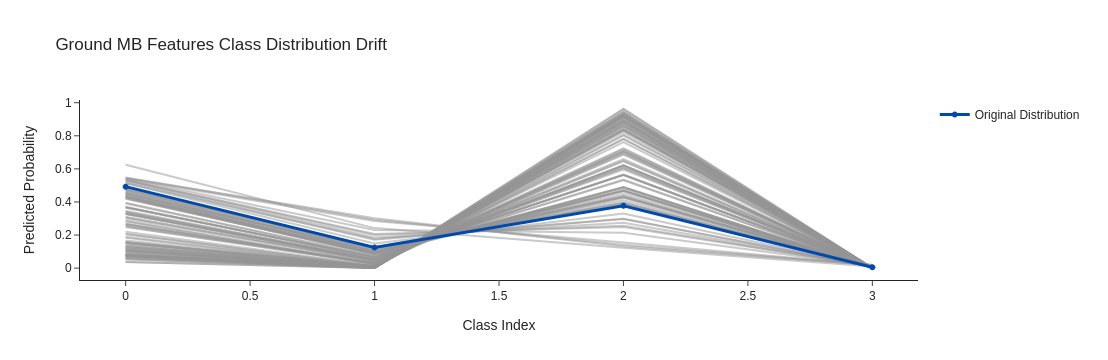

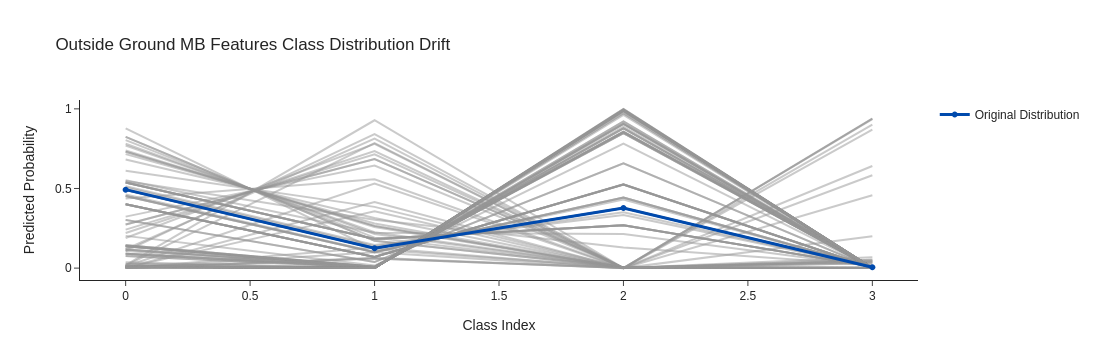

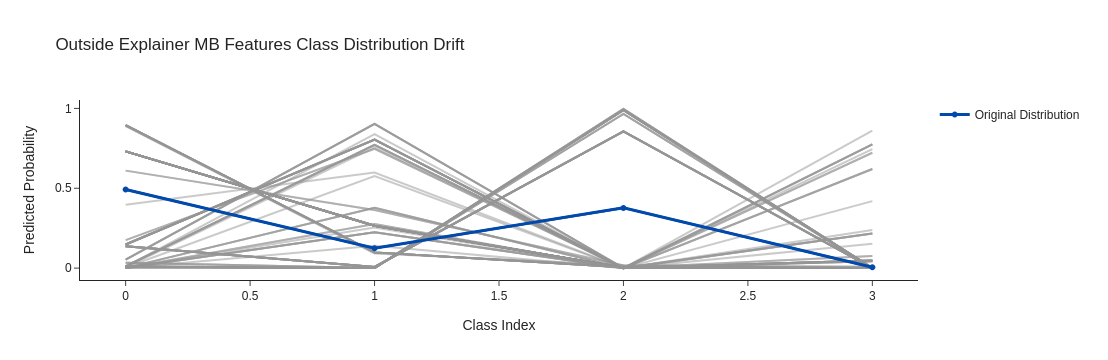

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.6776980539746947
Explainer MB Features Divergence: 0.0007060017506115222
Ground MB Features Divergence: 9.703063988077562e-07
Outside Ground MB Featues Divergence: 0.06111649111844461
Outside Explainer MB Features Divergence: 0.07462845451585373


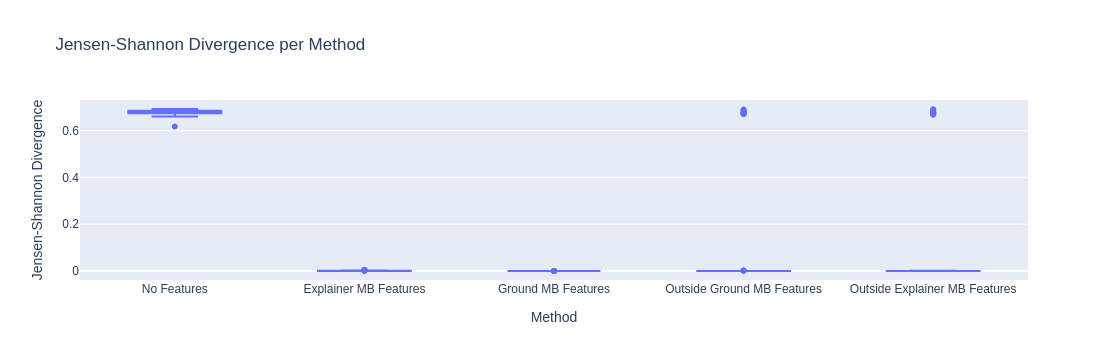

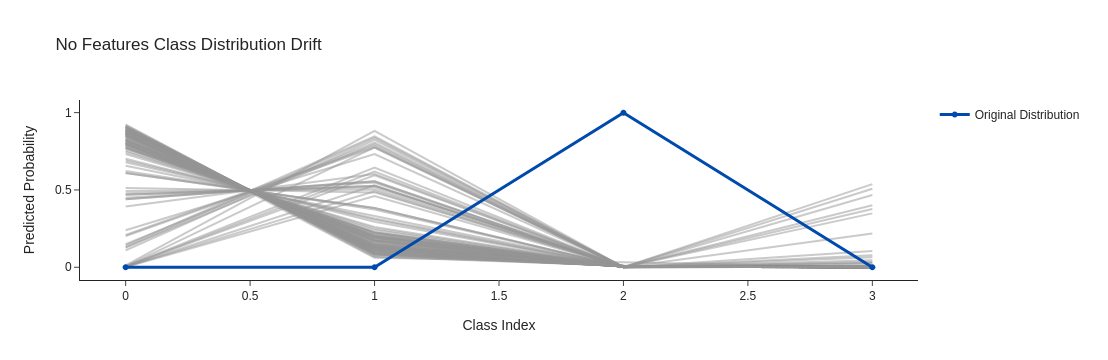

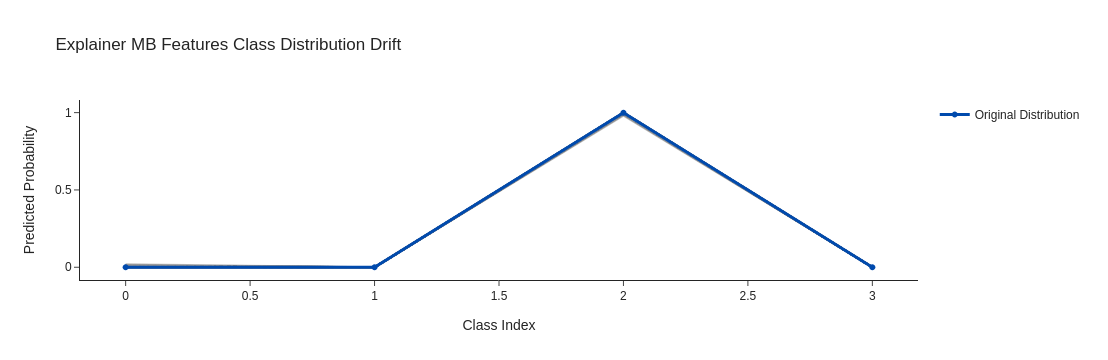

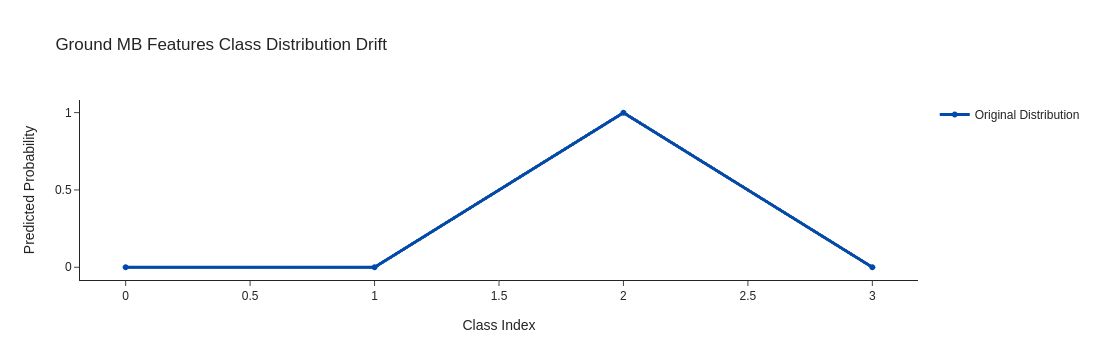

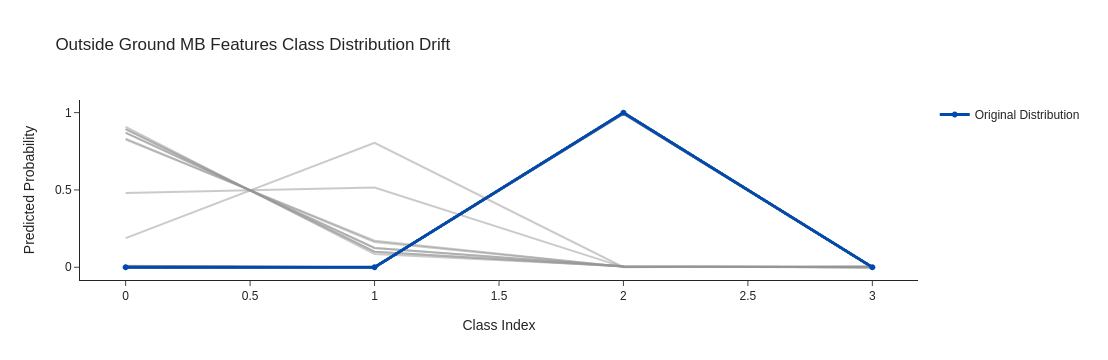

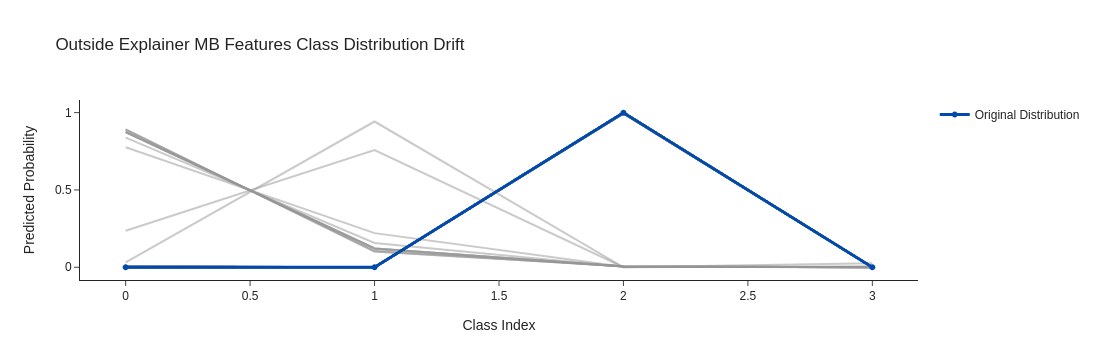

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.6776980539746947
Explainer MB Features Divergence: 3.982302112982312e-07
Ground MB Features Divergence: 1.0378160308374981e-05
Outside Ground MB Featues Divergence: 0.09506779611492892
Outside Explainer MB Features Divergence: 0.31910600175101894


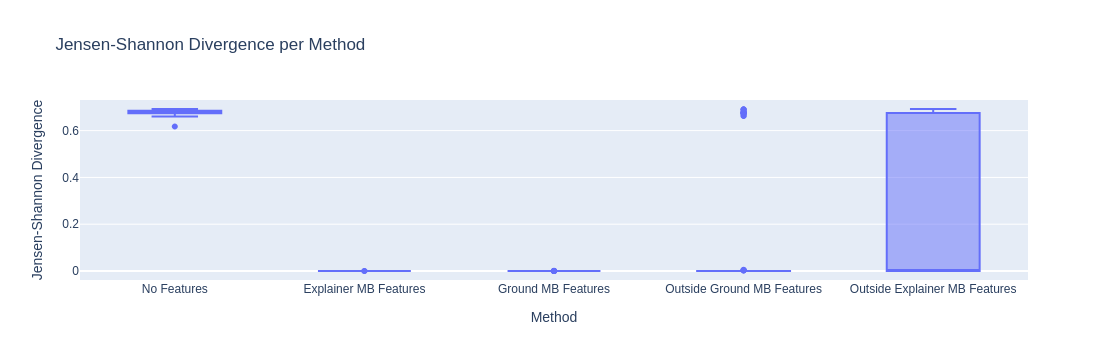

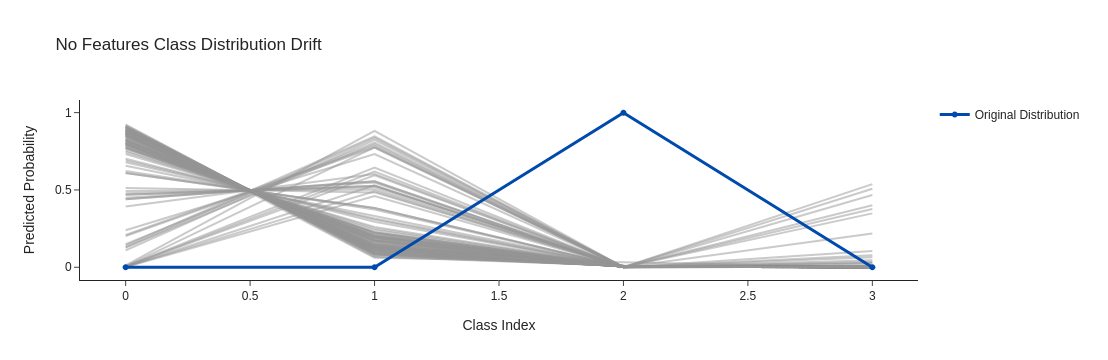

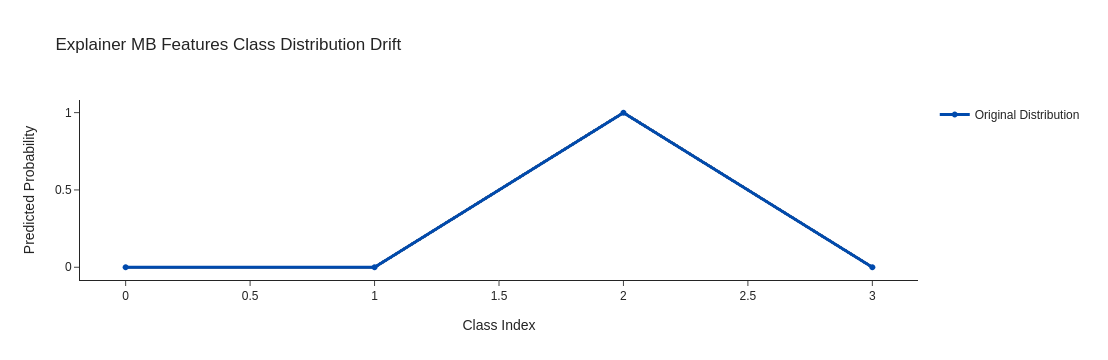

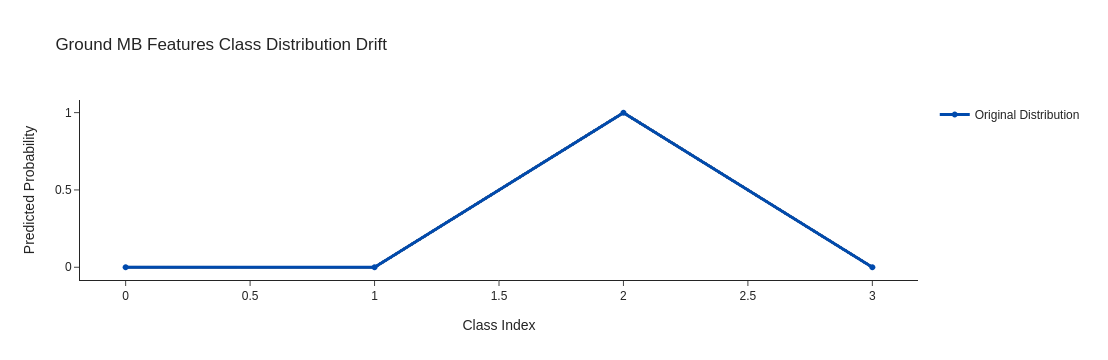

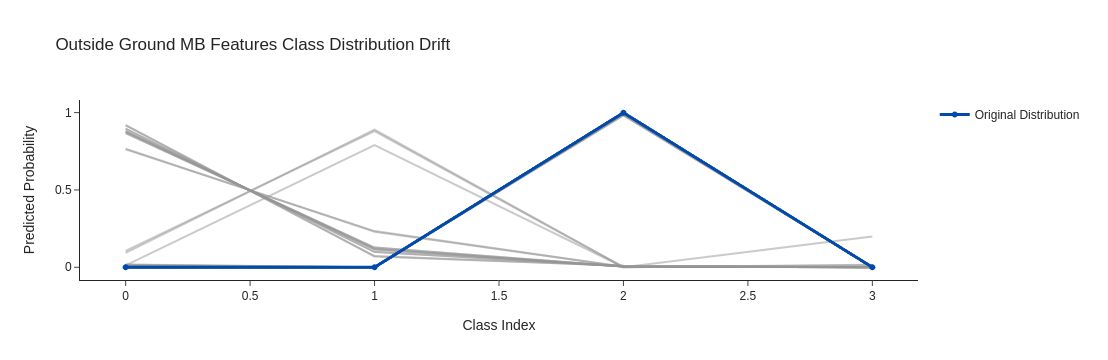

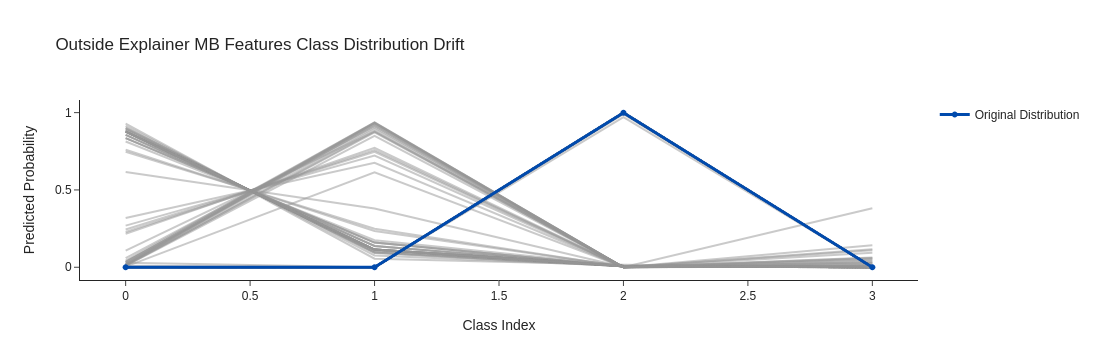

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.666732215447529
Explainer MB Features Divergence: 0.00046432547487052905
Ground MB Features Divergence: 0.06348450875741751
Outside Ground MB Featues Divergence: 0.44435224067319906
Outside Explainer MB Features Divergence: 0.21763334287057973


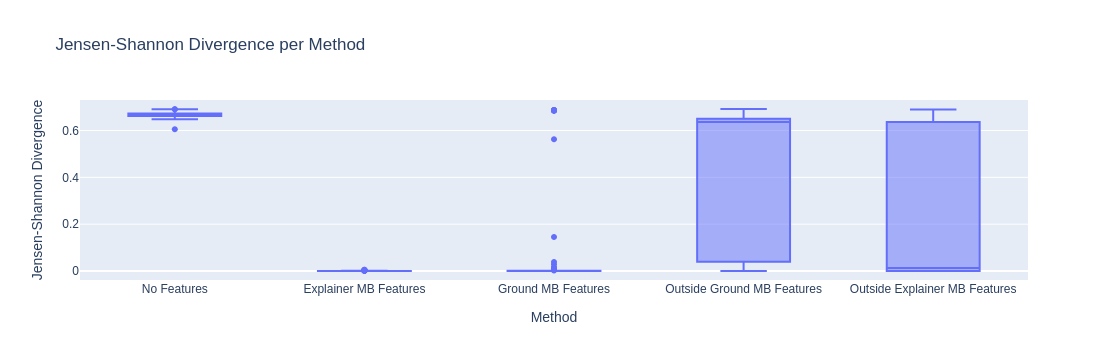

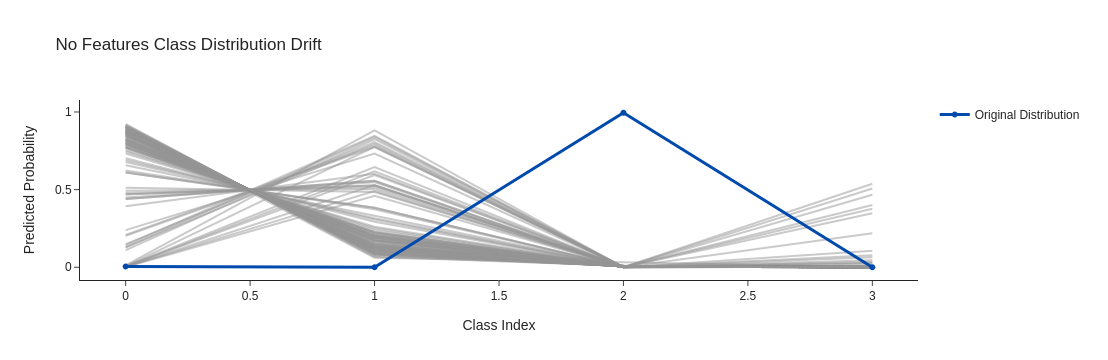

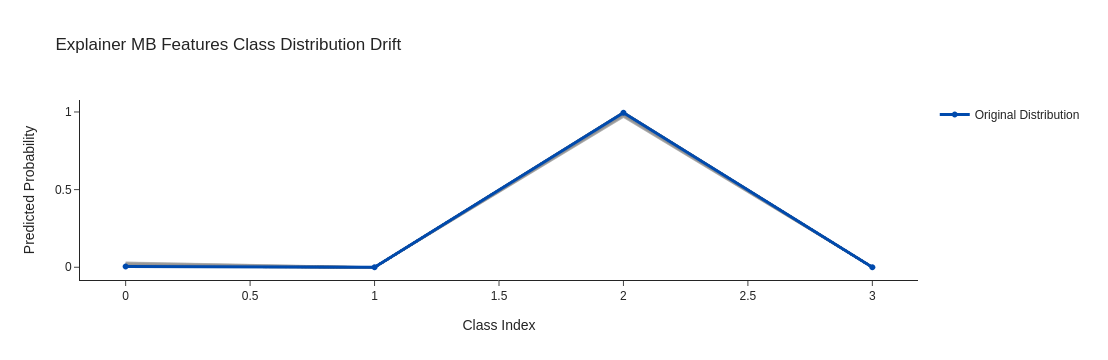

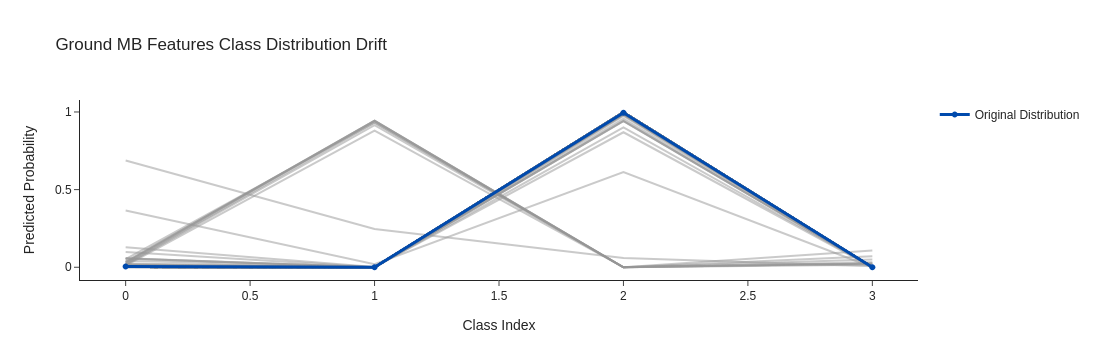

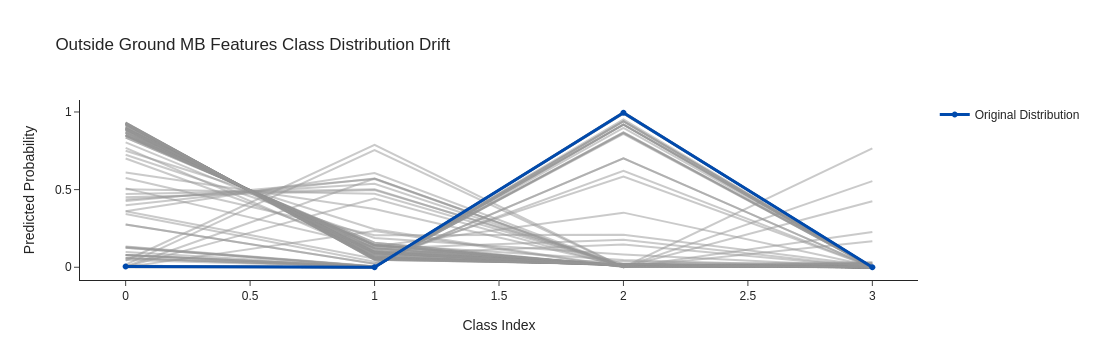

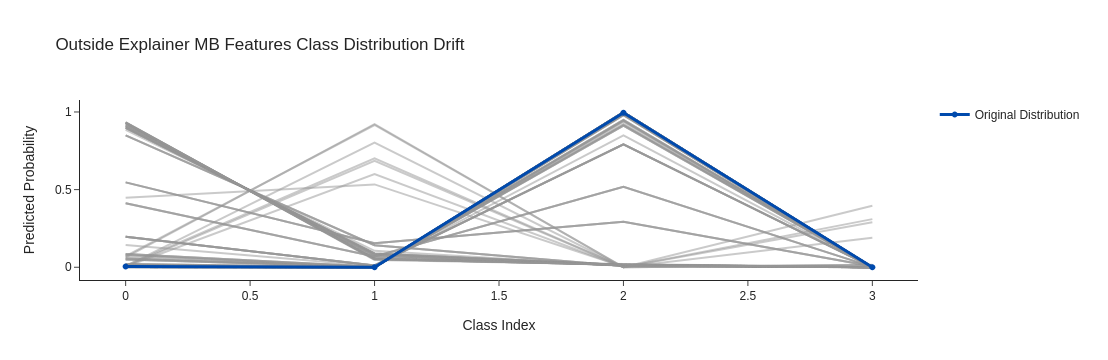

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.6776980539746947
Explainer MB Features Divergence: 7.645570558357362e-07
Ground MB Features Divergence: 2.0491812840879136e-05
Outside Ground MB Featues Divergence: 0.03522979776087651
Outside Explainer MB Features Divergence: 0.4876828062849042


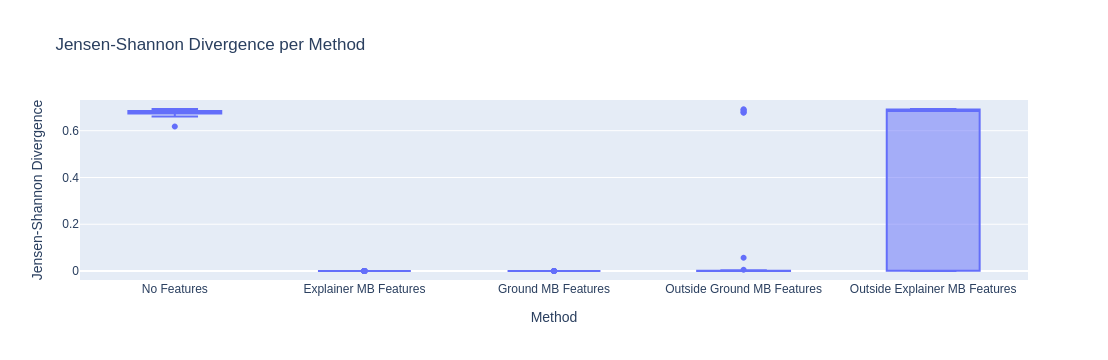

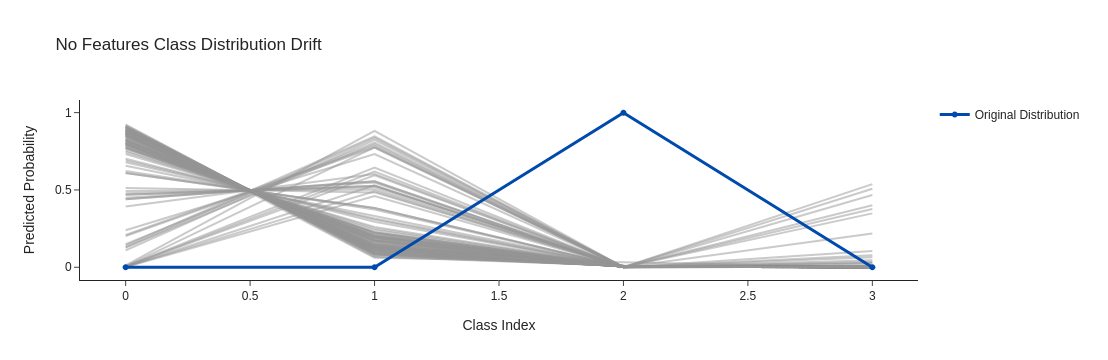

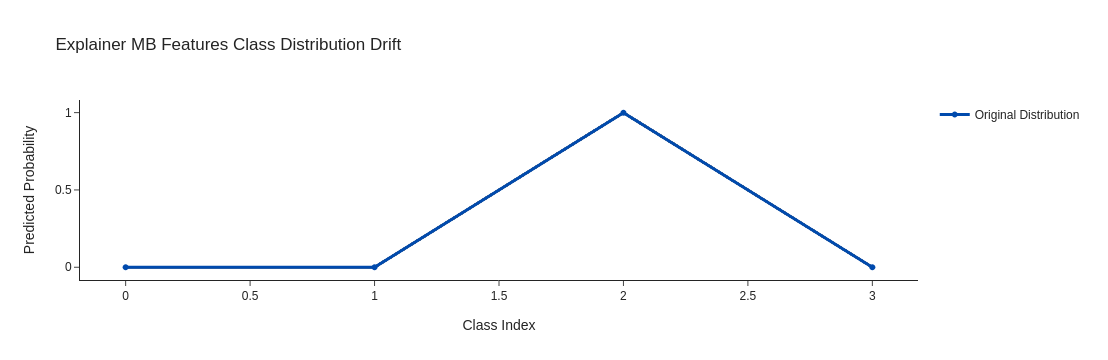

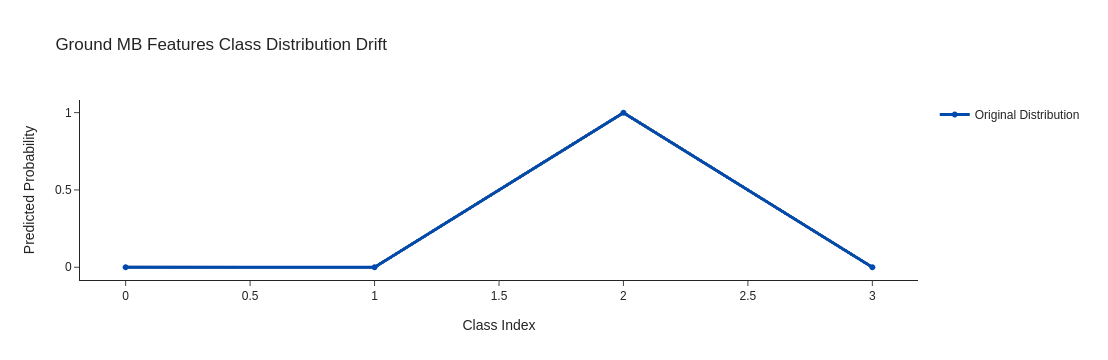

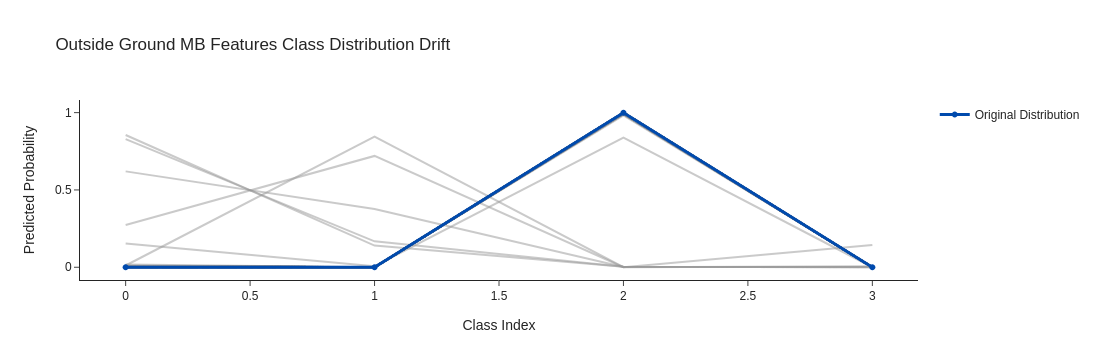

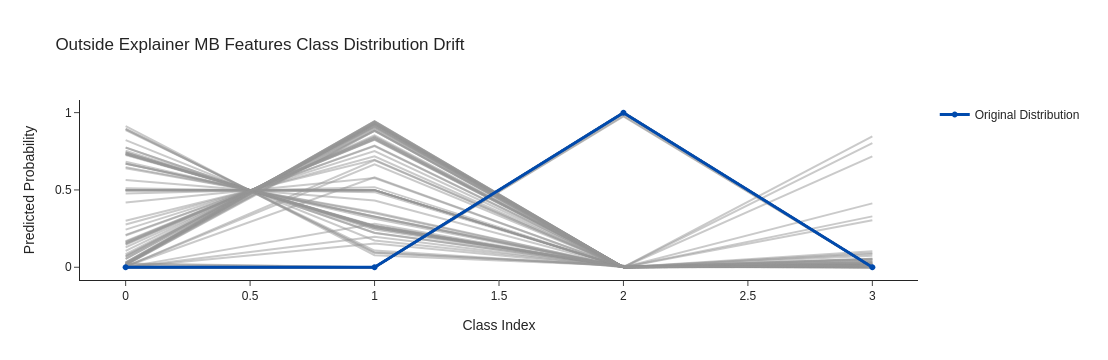

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.6773559766122637
Explainer MB Features Divergence: 0.00014462686060724798
Ground MB Features Divergence: 5.863247588355875e-05
Outside Ground MB Featues Divergence: 0.027797873846238125
Outside Explainer MB Features Divergence: 0.054995557937663496


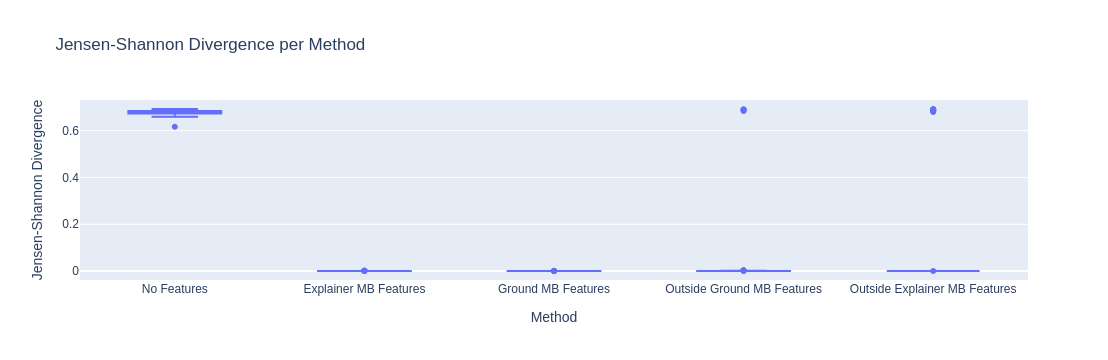

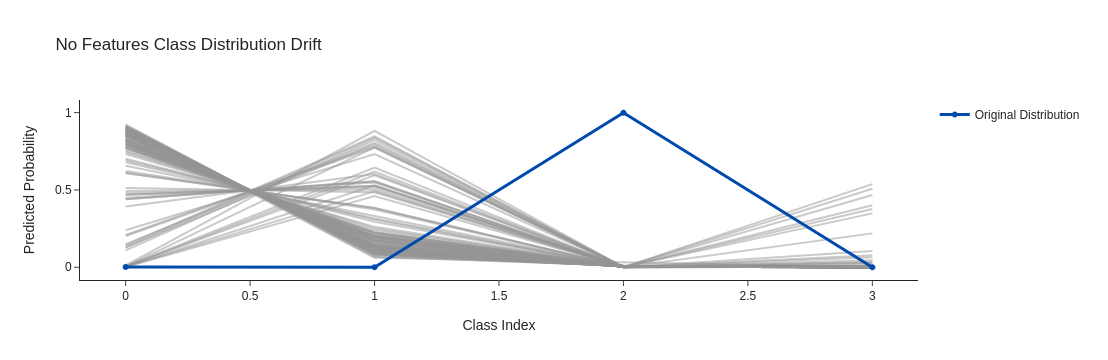

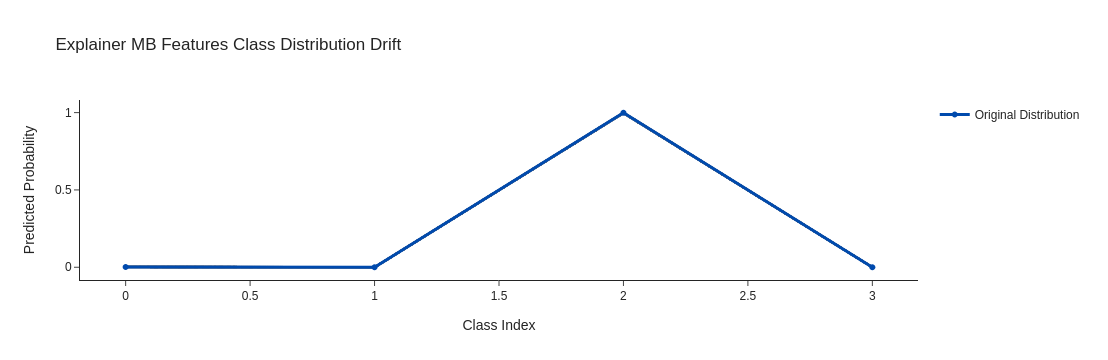

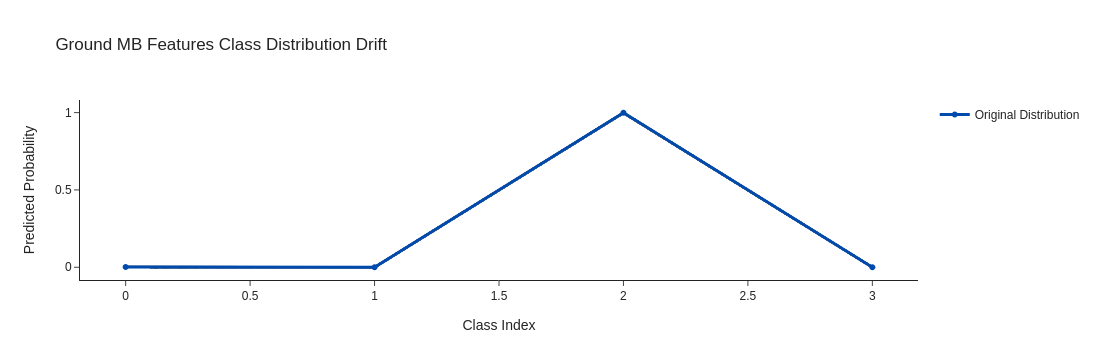

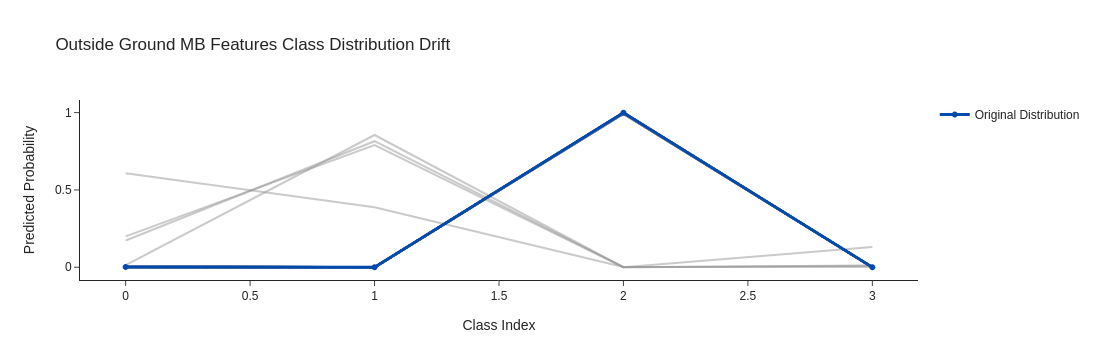

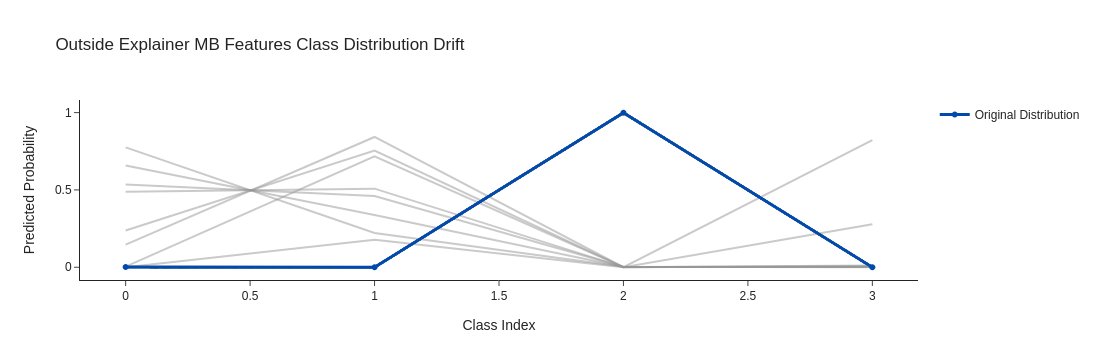

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.3319842952691178
Explainer MB Features Divergence: 0.13178094209045263
Ground MB Features Divergence: 0.28416928551218545
Outside Ground MB Featues Divergence: 0.1747432275321188
Outside Explainer MB Features Divergence: 0.173659995293256


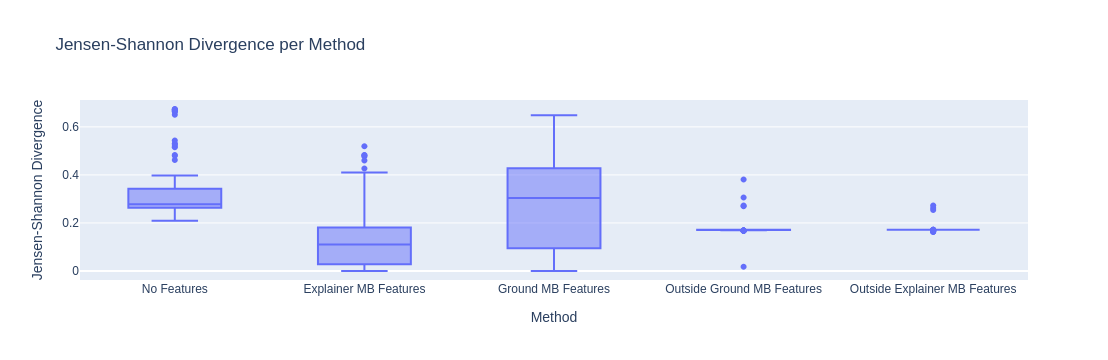

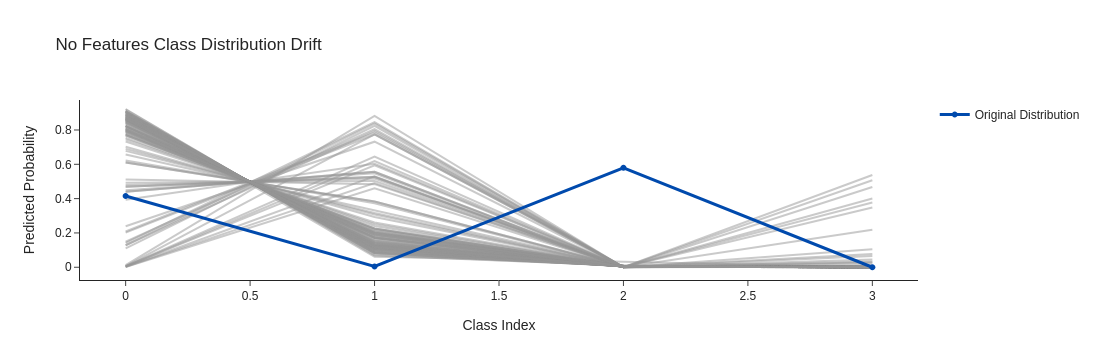

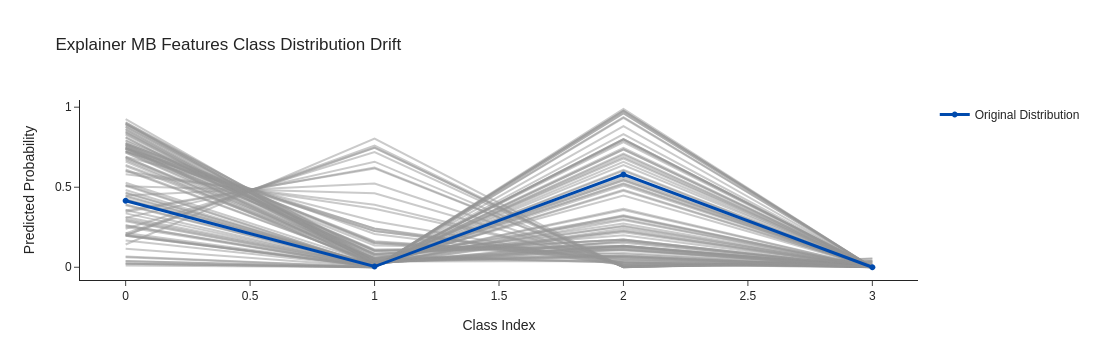

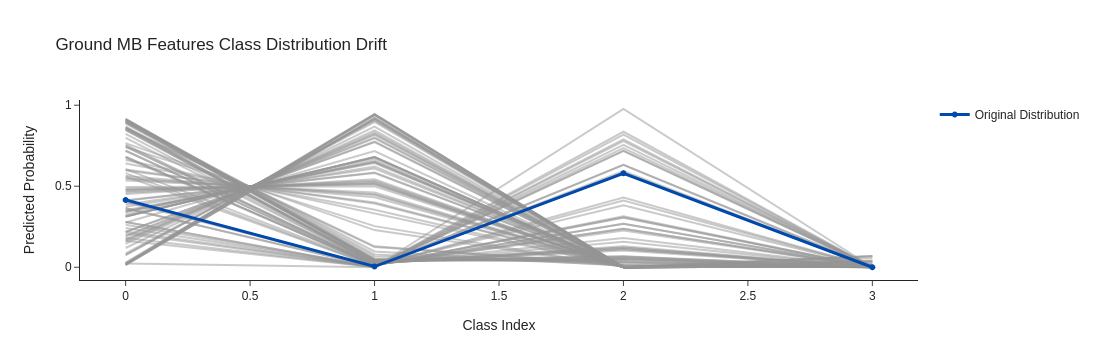

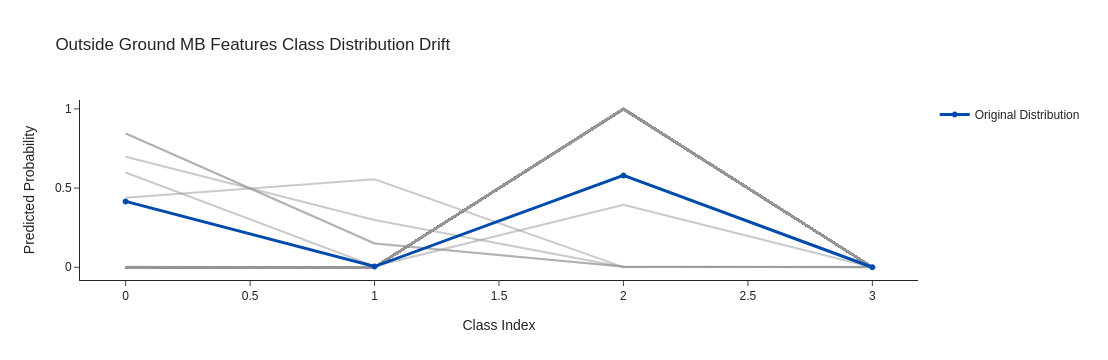

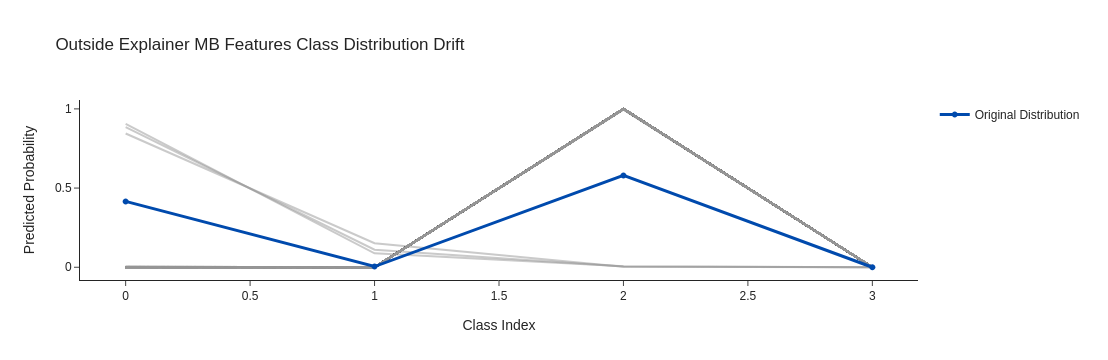

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.07414812596232298
Explainer MB Features Divergence: 0.018548706003607383
Ground MB Features Divergence: 0.029990549737841078
Outside Ground MB Featues Divergence: 0.5761365664627568
Outside Explainer MB Features Divergence: 0.5495289549761452


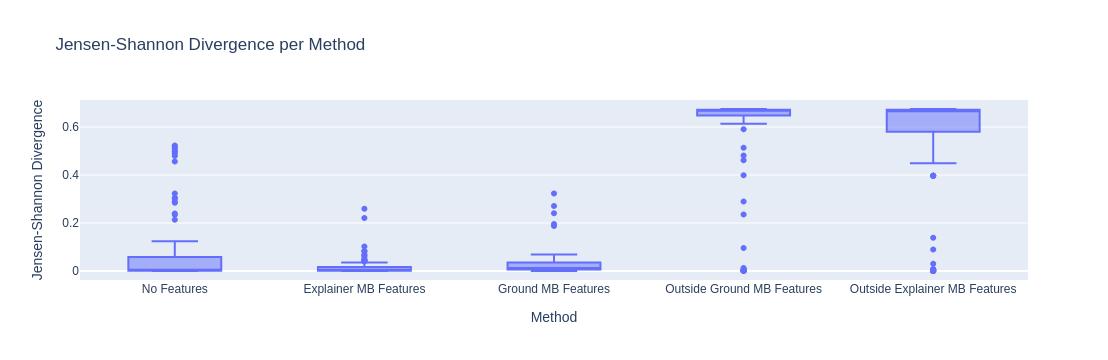

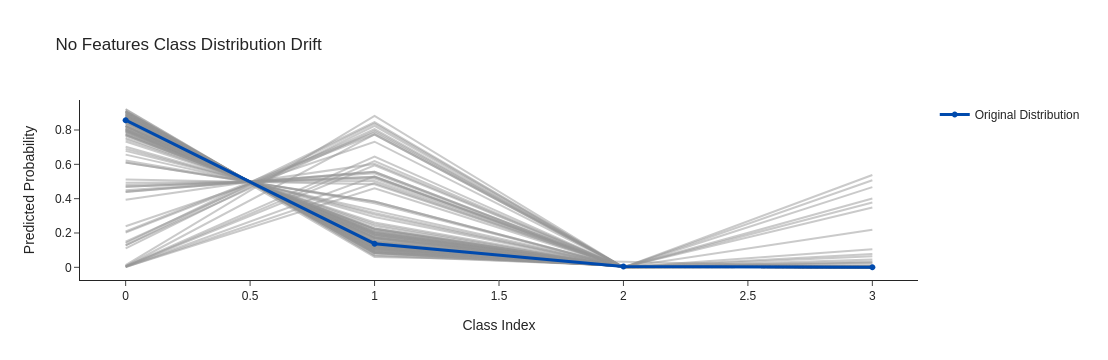

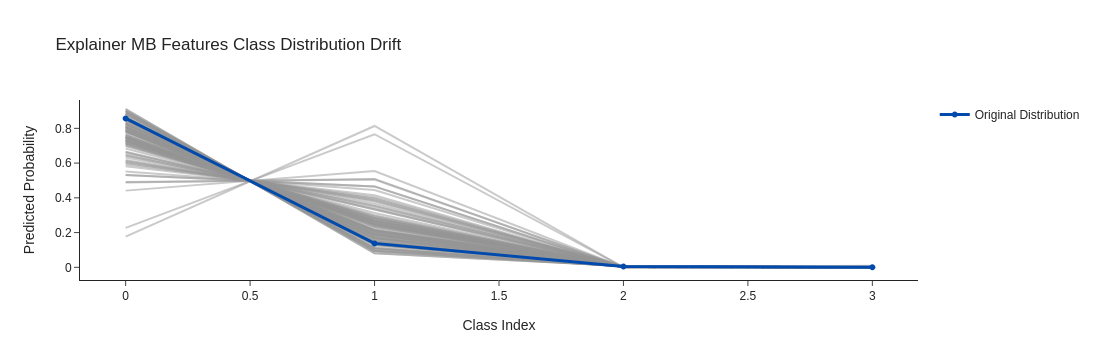

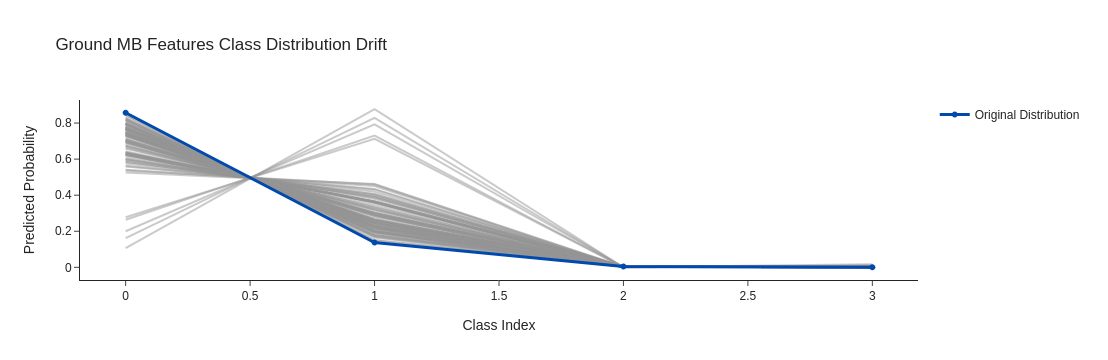

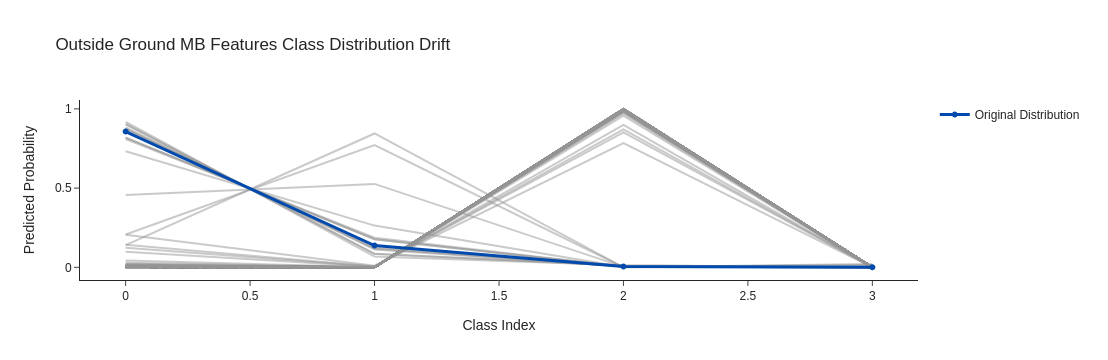

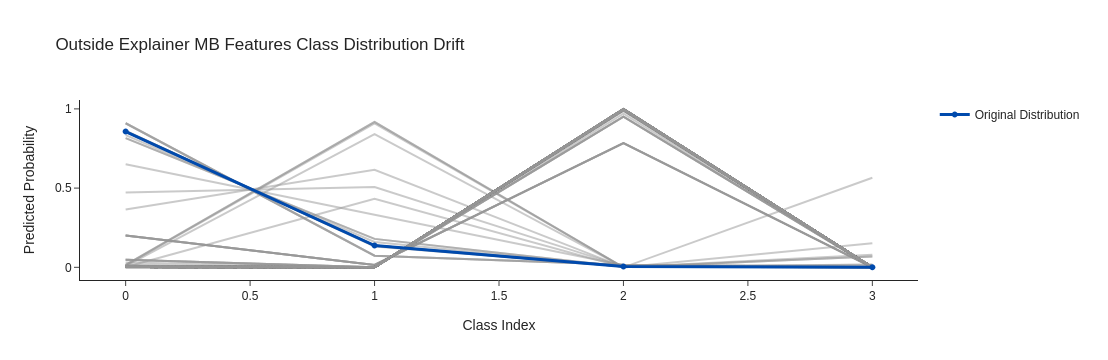

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C',

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C', 'OtherCarCost': 'C', 'SeniorTrain': 'C', 'SocioEcon': 'C', 'CarValue': 'C', 'ThisCarCost': 'C', 'OtherCar': 'C', 'RuggedAuto': 'C', 'ILiCost': 'C', 'MedCost': 'C', 'Age': 'C', 'GoodStudent': 'C', 'DrivQuality': 'C', 'MakeModel': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'ThisCarDam': 'C', 'HomeBase': 'C', 'Cushioning': 'C', 'Antilock': 'C', 'AntiTheft': 'C', 'DrivingSkill': 'C', 'DrivHist': 'C', 'Mileage': 'C', 'Theft': 'C', 'VehicleYear': 'C', 'Airbag': 'C', 'RiskAversion': 'C', 'PropCost': 'C',

  0%|          | 0/1000000 [00:00<?, ?it/s]

No Features Divergence: 0.6694051073289933
Explainer MB Features Divergence: 0.0004526938125665208
Ground MB Features Divergence: 0.00010683935037190816
Outside Ground MB Featues Divergence: 0.062203175688211446
Outside Explainer MB Features Divergence: nan


/home/vmuser/anaconda3/envs/venv/lib/python3.12/site-packages/scipy/spatial/distance.py:1388: RuntimeWarning:

invalid value encountered in sqrt



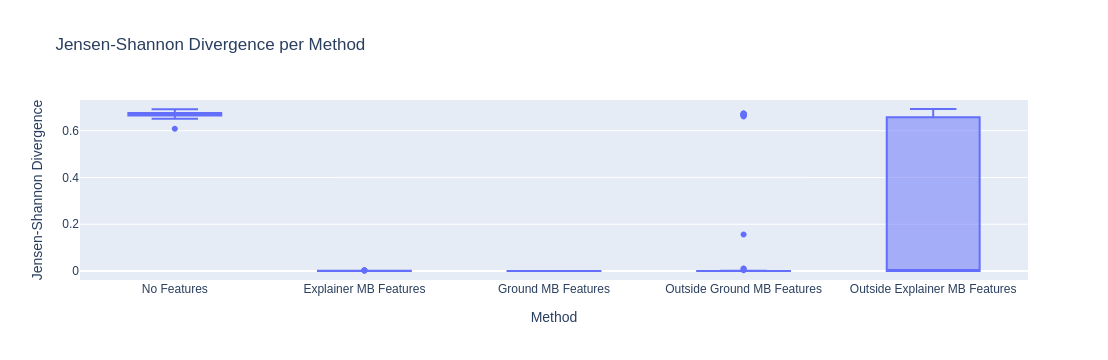

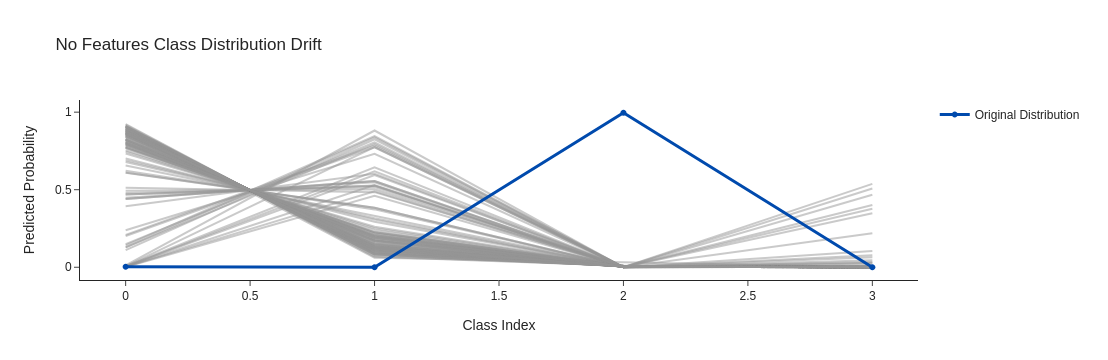

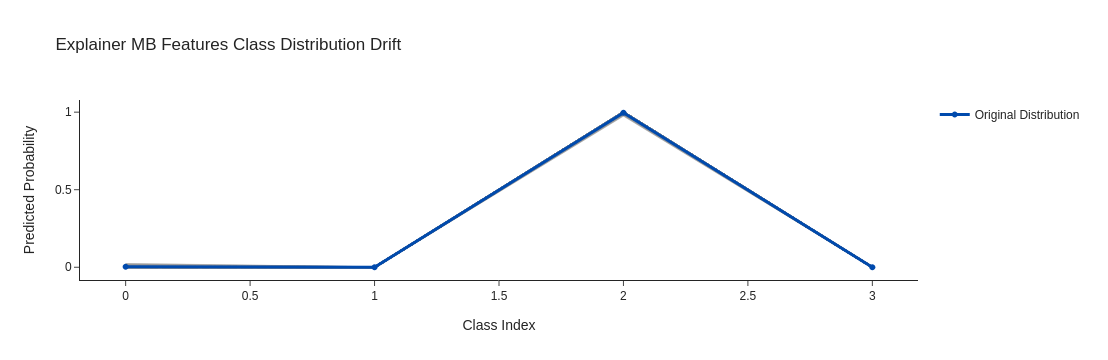

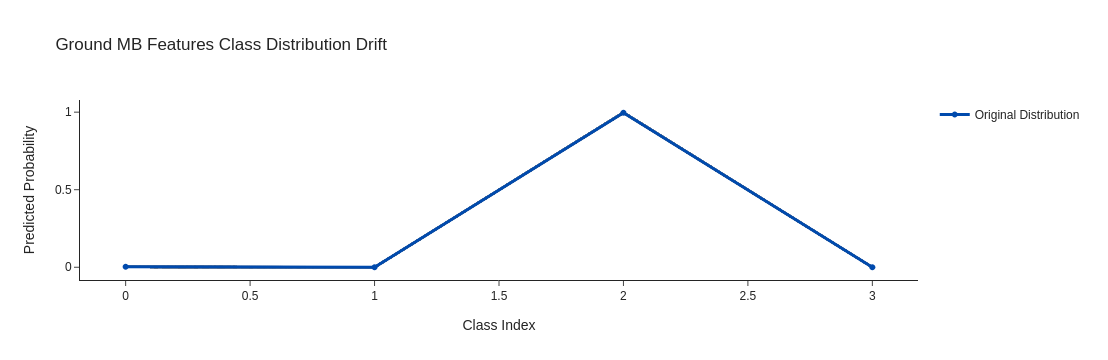

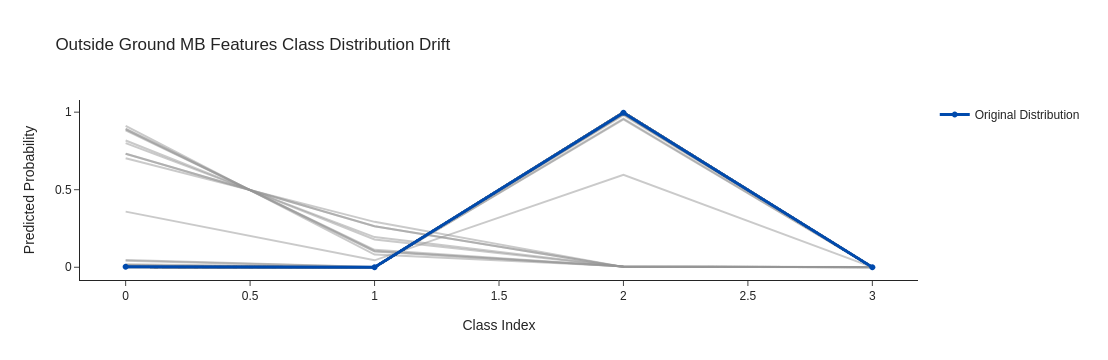

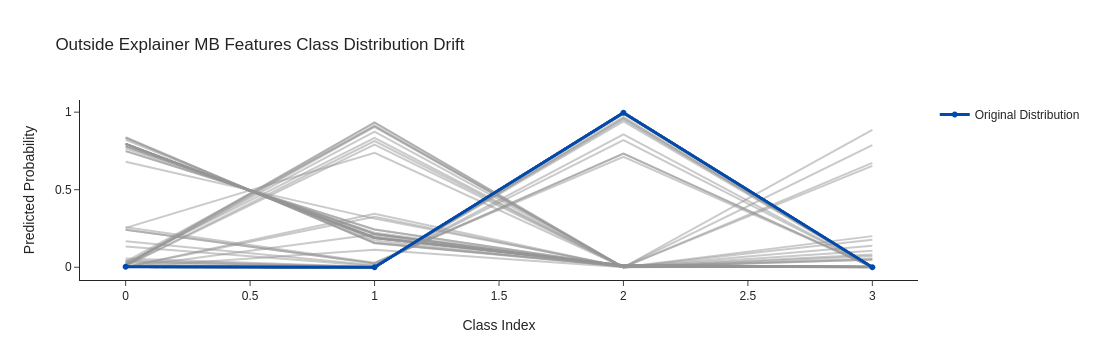

In [98]:
for _ in range(10):
    
    explainer = Explainer(
        model = model, 
        training_data = X_train, 
        feature_names = feature_names, 
        target_name = target_name, 
        n_samples = 5000, 
        rep_prob = 0.1
    )

    instance_idx = np.random.randint(X_test.shape[0])
    instance = X_test[instance_idx]
    
    explainer.log_data(instance)
    explainer.get_structures()

    explainer_mb_accuracy = mb_accuracy(ground_mb, explainer.bic_mb, target_name)

    # Features to freeze while randomizing the rest
    no_features = [] # randomize all features (baseline)
    explainer_features = list(explainer.bic_blanket) # freeze features returned from markov blanket of explainer
    ground_features = list(ground_mb.get_markov_blanket(target_name)) # freeze features from ground-truth markov blanket of target
    out_ground_features = [f for f in feature_names if f not in ground_features] # features outside of ground-truth markov blanket
    out_explainer_features = [f for f in feature_names if f not in explainer_features] # features outside of explainer markov blanket
    
    no_new, no_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = no_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = 100
    )
    
    explainer_new, explainer_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = explainer_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = 100
    )
    
    ground_new, ground_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = ground_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = 100
    )
    
    out_ground_new, out_ground_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = out_ground_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = 100
    )
    
    out_explainer_new, out_explainer_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = out_explainer_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = 100
    )
    
    no_avg, no_values = average_distribution_drift(no_og, no_new)
    explainer_avg, explainer_values = average_distribution_drift(explainer_og, explainer_new)
    ground_avg, ground_values = average_distribution_drift(ground_og, ground_new)
    out_ground_avg, out_ground_values = average_distribution_drift(out_ground_og, out_ground_new)
    out_explainer_avg, out_explainer_values = average_distribution_drift(out_explainer_og, out_explainer_new)
    
    js_values = np.stack((no_values, explainer_values, ground_values, out_ground_values, out_explainer_values))
    method_names = ['No Features', 'Explainer MB Features', 'Ground MB Features', 'Outside Ground MB Features', 'Outside Explainer MB Features']
    
    print(f'No Features Divergence: {no_avg}')
    print(f'Explainer MB Features Divergence: {explainer_avg}')
    print(f'Ground MB Features Divergence: {ground_avg}')
    print(f'Outside Ground MB Featues Divergence: {out_ground_avg}')
    print(f'Outside Explainer MB Features Divergence: {out_explainer_avg}')

    results.append({

        "dataset": dataset_name,

        "target": target_name,
        "features": feature_names,
        "mlp_accuracy": accuracy,
        
        "explainer_structure": list(explainer.bic_mb.edges()),
        "ground_structure": list(ground_mb.edges()),

        "explainer_mb_accuracy": explainer_mb_accuracy,
        
        "explainer_features": explainer_features,
        "ground_features": ground_features,
        "out_ground_features": out_ground_features,
        "out_explainer_features": out_explainer_features,
        
        "no_new": no_new.tolist(),
        "explainer_new": explainer_new.tolist(),
        "ground_new": ground_new.tolist(),
        "out_ground_new": out_ground_new.tolist(),
        "out_explainer_new": out_explainer_new.tolist(),
        
        "no_og": no_og.tolist(),
        "explainer_og": explainer_og.tolist(),
        "ground_og": ground_og.tolist(),
        "out_ground_og": out_ground_og.tolist(),
        
        "no_values": no_values,
        "explainer_values": explainer_values,
        "ground_values": ground_values,
        "out_ground_values": out_ground_values,
        "out_explainer_values": out_explainer_values,
        
        "no_avg": no_avg,
        "explainer_avg": explainer_avg,
        "ground_avg": ground_avg,
        "out_ground_avg": out_ground_avg,
        "out_explainer_avg": out_explainer_avg,
    })

    with open(f'{experiment_name}.json', 'w') as f:

        json.dump(results, f, indent = 4)
    
    divergence_plot(js_values, method_names)
    
    fidelity_plot(no_new, no_og, method_names[0])
    fidelity_plot(explainer_new, explainer_og, method_names[1])
    fidelity_plot(ground_new, ground_og, method_names[2])
    fidelity_plot(out_ground_new, out_ground_og, method_names[3])
    fidelity_plot(out_explainer_new, out_explainer_og, method_names[4])